# **Exploração, análise e tratamento dos dados: projeto previsão de doença cardíada**

Objetivo: desenvolver um algoritmo de Machine Learning para prever a tendência  de uma pessoa desenvolver algum tipo de deonça cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/heart.csv',
                    sep = ',', encoding = 'iso-8859-1')

In [ ]:
dados.head() #mostra os 5 primeiros registros em forma de tabela

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
dados.tail() #mostra os 5 últimos registros em forma de tabela

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [ ]:
dados.shape

(918, 12)

# **Análise das variáveis (atributos)**

**Age = idade**

In [ ]:
dados['Age'].value_counts() #mostra a contagem de valores da coluna Age, fora de ordem

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
dados['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
# criação do histograma
hist1 = px.histogram (dados, x = 'Age', nbins = 60)
hist1.update_layout(width=800, height=500, title_text='Distribuição das idades')
hist1.show()

In [ ]:
import seaborn as sns

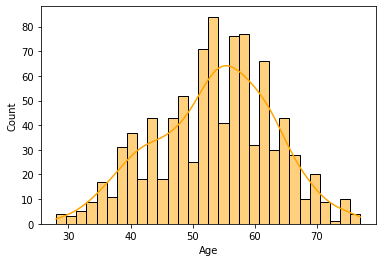

In [ ]:
sns.histplot(dados, x='Age', bins=30, color='orange', kde=True, stat='count');

## **Sex = sexo**

In [ ]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

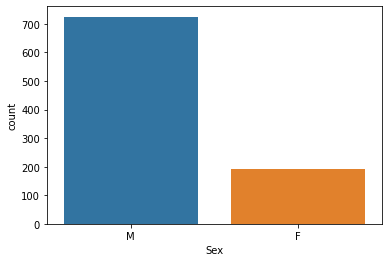

In [ ]:
sns.countplot(x = 'Sex', data=dados);

# **Chest pain type = tipo de dor no peito**

In [ ]:
dados['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

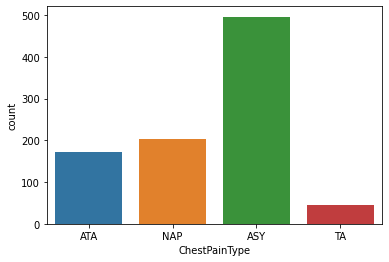

In [ ]:
sns.countplot(x='ChestPainType', data=dados);

# **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg (sistólica)**

In [ ]:
dados['RestingBP'].value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

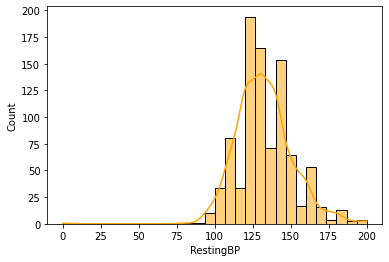

In [31]:
sns.histplot(dados, x='RestingBP', bins=30, color='orange', kde=True, stat='count');

# **Cholesterol = colesterol sérico (mg/dl)**

In [30]:
dados.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

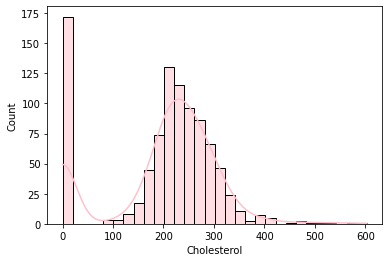

In [32]:
sns.histplot(dados, x='Cholesterol', bins=30, color='pink', kde=True, stat='count');

# **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [33]:
dados.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

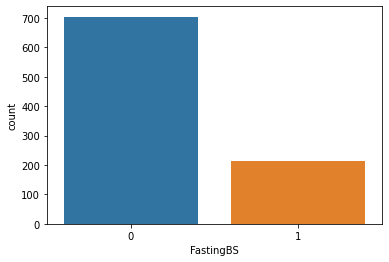

In [39]:
sns.countplot(x='FastingBS', data=dados);

# **Resting ECG = eletrocardiograma em repouso**

In [40]:
dados.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

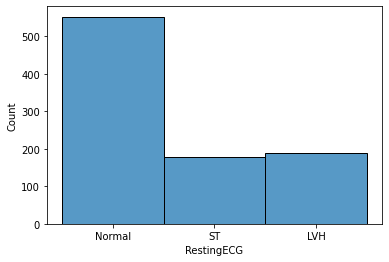

In [43]:
sns.histplot(x = 'RestingECG', data=dados);

# **Max HR (heart rate) = frequência cardíaca máxima**

In [44]:
dados['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

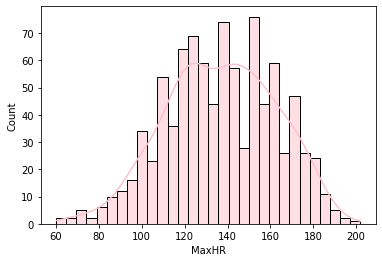

In [45]:
sns.histplot(dados, x='MaxHR', bins=30, color='Pink', kde=True, stat='count');

# **Exercise Angina = Angina induzida por exercício**

In [46]:
dados['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [47]:
px.pie(dados, 'ExerciseAngina')

# **Oldpeak**

In [49]:
dados['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

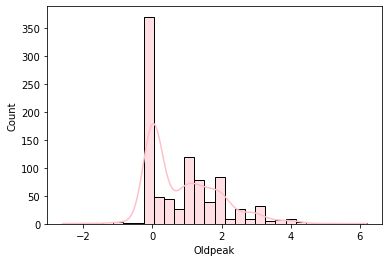

In [52]:
sns.histplot(dados, x='Oldpeak', bins=30, color='pink',kde=True, stat='count');

# **ST_Slope = Inclinação do segmento ST no ECG**

In [53]:
dados.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [55]:
px.pie(dados, 'ST_Slope')

# **Heart Disease = Doença cardíaca**

In [56]:
dados.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [57]:
px.pie(dados, 'HeartDisease')

# **Análise dos tipos de atributos**

In [61]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos

dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# **Valores missing**